In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
#Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82b2a87027ec60617e3b93e48b573a21


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | angoche
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | santa fe
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | solomenskoye
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | ri

Processing Record 36 of Set 4 | saleaula
City not found. Skipping...
Processing Record 37 of Set 4 | codajas
Processing Record 38 of Set 4 | tingi
Processing Record 39 of Set 4 | krasnokamensk
Processing Record 40 of Set 4 | mizdah
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | sao jose da coroa grande
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | aksarka
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | seoul
Processing Record 47 of Set 4 | diffa
Processing Record 48 of Set 4 | melipilla
Processing Record 49 of Set 4 | sinkat
City not found. Skipping...
Processing Record 50 of Set 4 | gari
Processing Record 1 of Set 5 | muromtsevo
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | gunzenhausen
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | kieta
Processing Record 7 of Set 5 | zabid
Processing Record 8 of Set 5 | ilulissat
Proces

Processing Record 24 of Set 8 | flinders
Processing Record 25 of Set 8 | laguna de perlas
Processing Record 26 of Set 8 | tessalit
Processing Record 27 of Set 8 | kuche
City not found. Skipping...
Processing Record 28 of Set 8 | jatai
Processing Record 29 of Set 8 | port-cartier
Processing Record 30 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 31 of Set 8 | helena
Processing Record 32 of Set 8 | kalamata
Processing Record 33 of Set 8 | north myrtle beach
Processing Record 34 of Set 8 | atasu
Processing Record 35 of Set 8 | honningsvag
Processing Record 36 of Set 8 | ebeltoft
Processing Record 37 of Set 8 | gorban
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | mao
Processing Record 40 of Set 8 | kuching
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | half moon bay
Processing Record 43 of Set 8 | khulna
Processing Record 44 of Set 8 | adrar
Processing Record 45 of Set 8 | januaria
Processing R

Processing Record 11 of Set 12 | sorland
Processing Record 12 of Set 12 | solnechnyy
Processing Record 13 of Set 12 | mitchell
Processing Record 14 of Set 12 | iracoubo
Processing Record 15 of Set 12 | longyearbyen
Processing Record 16 of Set 12 | waingapu
Processing Record 17 of Set 12 | guaruja
Processing Record 18 of Set 12 | patacamaya
Processing Record 19 of Set 12 | verkhnyaya inta
Processing Record 20 of Set 12 | pemangkat
Processing Record 21 of Set 12 | skerries
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | acurenam
Processing Record 24 of Set 12 | kaseda
Processing Record 25 of Set 12 | port lavaca
Processing Record 26 of Set 12 | crab hill
City not found. Skipping...
Processing Record 27 of Set 12 | axim
Processing Record 28 of Set 12 | pauini
Processing Record 29 of Set 12 | bandarbeyla
Processing Record 30 of Set 12 | kaffrine
Processing Record 31 of Set 12 | vavatenina
Processing Record 32 of Set 12 | simao
Processing Record 33 of Set 12 | aflu
Ci

In [10]:
len(city_data)

566

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Angoche,-16.2325,39.9086,80.78,83,6,8.03,MZ,2022-03-06 16:14:56
1,Chuy,-33.6971,-53.4616,74.80,79,100,4.43,UY,2022-03-06 16:14:57
2,Port Alfred,-33.5906,26.8910,77.11,78,79,20.71,ZA,2022-03-06 16:14:57
3,Kapaa,22.0752,-159.3190,66.18,88,40,9.22,US,2022-03-06 16:14:57
4,Santa Fe,-31.6333,-60.7000,76.01,88,100,5.75,AR,2022-03-06 16:10:10
5,Bluff,-46.6000,168.3333,50.81,70,100,10.98,NZ,2022-03-06 16:14:58
6,Khatanga,71.9667,102.5000,-13.36,99,100,2.35,RU,2022-03-06 16:14:58
7,Nemuro,43.3236,145.5750,29.07,85,100,40.13,JP,2022-03-06 16:14:18
8,Ancud,-41.8697,-73.8203,59.43,91,100,22.21,CL,2022-03-06 16:14:58
9,Tasiilaq,65.6145,-37.6368,32.16,87,100,2.48,GL,2022-03-06 16:14:59


In [21]:
#cols = city_data_df.columns.tolist()
#cols
# Reorder Columns
new_col_ord = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Assign new dataframe with reordered columns
city_data_df = city_data_df[new_col_ord]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Angoche,MZ,2022-03-06 16:14:56,-16.2325,39.9086,80.78,83,6,8.03
1,Chuy,UY,2022-03-06 16:14:57,-33.6971,-53.4616,74.80,79,100,4.43
2,Port Alfred,ZA,2022-03-06 16:14:57,-33.5906,26.8910,77.11,78,79,20.71
3,Kapaa,US,2022-03-06 16:14:57,22.0752,-159.3190,66.18,88,40,9.22
4,Santa Fe,AR,2022-03-06 16:10:10,-31.6333,-60.7000,76.01,88,100,5.75
...,...,...,...,...,...,...,...,...,...
561,Ormond Beach,US,2022-03-06 16:26:26,29.2858,-81.0559,84.25,66,40,12.66
562,Tereze,RU,2022-03-06 16:29:51,43.9361,42.4434,23.50,95,100,2.17
563,Okoneshnikovo,RU,2022-03-06 16:29:51,54.8377,75.0834,33.80,98,100,18.63
564,Hirara,JP,2022-03-06 16:29:52,24.8000,125.2833,66.63,71,100,15.26


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

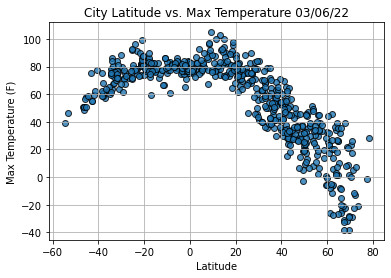

In [23]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

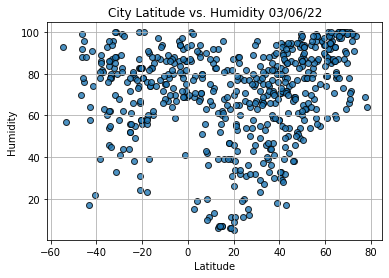

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

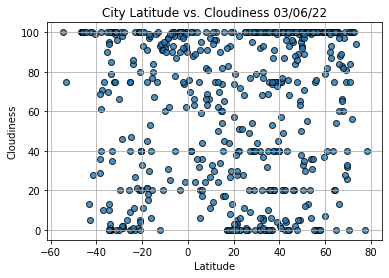

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

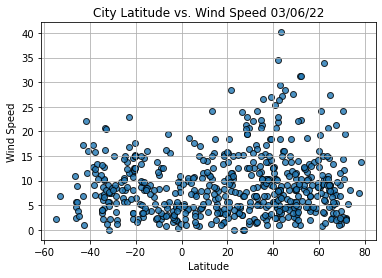

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()